<a href="https://colab.research.google.com/github/arka2602/Approach-to-Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing the Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Load the Dataset**

In [ ]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df['Rating_Polarity'] = df['Rating'].apply(lambda x: 'Positive' if x>3 else('Neutral' if x== 3  else 'Negative'))

In [ ]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


##**Data Analysis**

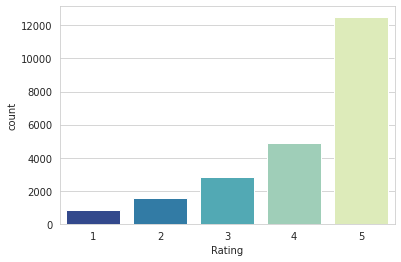

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r')

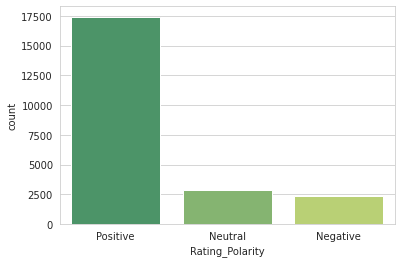

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating_Polarity',data=df, palette='summer')

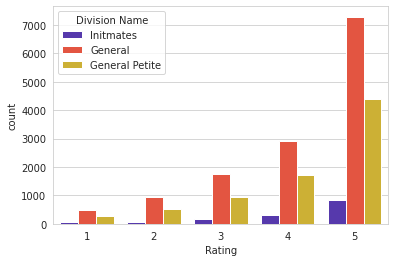

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Division Name',data=df,palette='CMRmap')

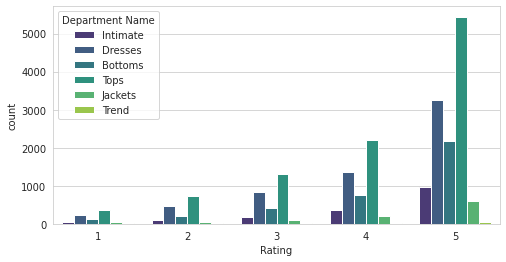

In [ ]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Rating',hue='Department Name',data=df,palette='viridis')

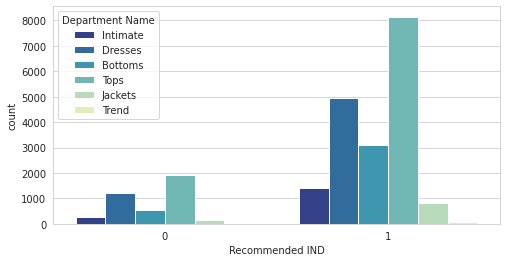

In [ ]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x='Recommended IND',hue='Department Name',data=df,palette='YlGnBu_r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


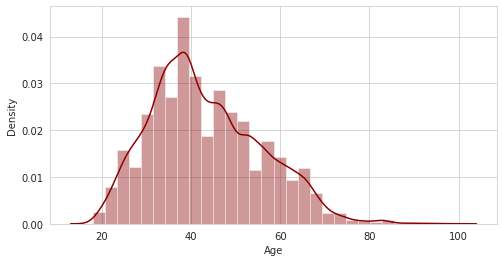

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(df['Age'],color='darkred',bins=30)

##**Dealing with imbalanced Dataset**

In [ ]:
df_class_Positive = df[df['Rating_Polarity'] == 'Positive'][0:8000]
df_class_Neutral = df[df['Rating_Polarity'] == 'Neutral']
df_class_Negative = df[df['Rating_Polarity'] == 'Negative']

Random over-sampling:
Negative    8000
Positive    8000
Neutral     8000
Name: Rating_Polarity, dtype: int64


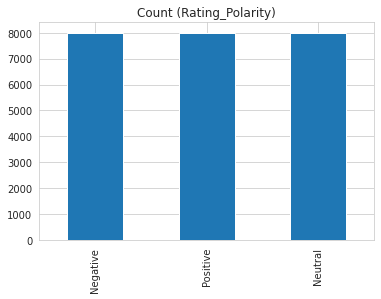

In [ ]:
df_class_Neutral_over = df_class_Neutral.sample(8000, replace=True)
df_class_Negative_over = df_class_Negative.sample(8000, replace=True)
df = pd.concat([df_class_Positive, df_class_Neutral_over, df_class_Negative_over], axis=0)

print('Random over-sampling:')
print(df['Rating_Polarity'].value_counts())

df['Rating_Polarity'].value_counts().plot(kind='bar', title='Count (Rating_Polarity)');

In [ ]:
df.shape

(24000, 9)

In [ ]:
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def text_processing(text):
    
    Stopwords = stopwords.words('english')
    # Check characters to see if they are in punctuation
    no_punctuation = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    no_punctuation = ''.join(no_punctuation)
    
    # Now just remove any stopwords
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in Stopwords])

In [ ]:
df['review'] = df['Review Text'].apply(text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Rating_Polarity,review
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im ...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perf...
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...


In [ ]:
df=df[['review', 'Rating_Polarity']]
df.head()

,review,Rating_Polarity
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im ...,Positive
3,love love love jumpsuit fun flirty fabulous ev...,Positive
4,shirt flattering due adjustable front tie perf...,Positive
6,aded basket hte last mintue see would look lik...,Positive


In [ ]:
# one hot encoding
one_hot = pd.get_dummies(df["Rating_Polarity"])
df.drop(['Rating_Polarity'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im ...,0,0,1
3,love love love jumpsuit fun flirty fabulous ev...,0,0,1
4,shirt flattering due adjustable front tie perf...,0,0,1
6,aded basket hte last mintue see would look lik...,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X=df['review'].values
y=df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Vectorization
bow = CountVectorizer()
X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train=X_train.toarray()
X_test=X_test.toarray()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
X_train.shape

(16800, 12655)

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

##**Build the Model**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 455s 7s/step - loss: 0.6188 - accuracy: 0.7230 - val_loss: 0.3345 - val_accuracy: 0.8758
Epoch 2/100
66/66 [==============================] - 463s 7s/step - loss: 0.1123 - accuracy: 0.9627 - val_loss: 0.2644 - val_accuracy: 0.9176
Epoch 3/100
66/66 [==============================] - 466s 7s/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.3641 - val_accuracy: 0.9110
Epoch 4/100
66/66 [==============================] - 476s 7s/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.3719 - val_accuracy: 0.9140
Epoch 00004: early stopping


In [ ]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,5)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.618800,0.722976,0.334498,0.875833,1
2,0.112350,0.962679,0.264425,0.917639,2
3,0.016807,0.995238,0.364143,0.910972,3
4,0.010340,0.997440,0.371935,0.914028,4


In [ ]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

113/113 [==============================] - 73s 650ms/step - loss: 0.3719 - accuracy: 0.9140
Test accuracy: 0.914027750492096


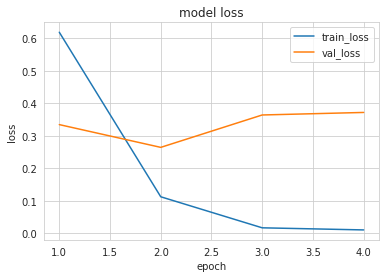

In [ ]:
#Loss Graph(Training and Validation)
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

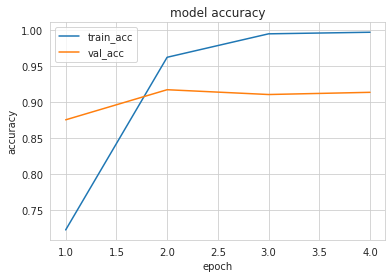

In [ ]:
# Accuracy Graph(Training and Validation) 
plt.plot(df_m['accuracy'])
plt.plot(df_m['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))
print(classification_report(np.argmax(y_test,axis=1),np.argmax(preds,axis=1)))

[[2291   82   63]
 [  71 2220  114]
 [  73  216 2070]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2436
           1       0.88      0.92      0.90      2405
           2       0.92      0.88      0.90      2359

    accuracy                           0.91      7200
   macro avg       0.91      0.91      0.91      7200
weighted avg       0.91      0.91      0.91      7200

